# AIDM7330 Basic Programming for Data Science
## AY 2023/2024 Semester 1

# Exam Notebook
# 24h (+) Data Analysis and Visualization Challenge

# <div style="color: orange">Submission deadline 9 December 2023 @23:59</div>
# Deliverables
1. This Jupyter notebook (in .ipynb format), with all cells already executed

# <div style="color: red">Please Complete This Section</div>
## Student Information
Student Name (English): LUO Fan

Student ID: 23435968

## Declaration of Integrity

**I confirm that the work for the following exam notebook was solely undertaken by myself and that no help was provided from other sources as those allowed.**

Please type your name and today’s date on the following fields if you agree with the statement. **<ins>Failing to do so your submission will not be considered valid.</ins>**

Name: LUO Fan

Date: 2023-12-8

# <div style="color: LimeGreen">Part 1: Project Setup [10%]</div>

# 1.1 Load the Libraries (1')
Import all the required libraries in this section (e.g. pandas, numpy, etc.)

In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install nltk

In [2]:
#important command to display IMMEDIATELY your plots
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [7]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=16263766cc6152e644a2a30a22bd2f972faa6f0f26a6503fdfa5db6563f3cbd0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


# 1.2 Import the datasets in Pandas (1')
Import the datasets for:
- Netflix
- PrimeVideo
- Hulu
- Disney Plus

Use multiple dataframes.

In [8]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://kweakkk.github.io/'
docs = ['MoviesOnDisneyPlus.csv', 'MoviesOnHulu.csv', 'MoviesOnNetflix.csv','MoviesOnPrimeVideo.csv']

for doc in docs:
  fullURL = baseURL + doc
  dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

  # Download the file
  fileName = wget.download(fullURL, out=dataPath)

  # Print the file name including the local path
  print(fileName)

/content/drive/MyDrive/Colab Notebooks/data/MoviesOnDisneyPlus (1).csv
/content/drive/MyDrive/Colab Notebooks/data/MoviesOnHulu (1).csv
/content/drive/MyDrive/Colab Notebooks/data/MoviesOnNetflix (1).csv
/content/drive/MyDrive/Colab Notebooks/data/MoviesOnPrimeVideo (1).csv


In [9]:
Netflix = pd.read_csv(dataPath + '/' + 'MoviesOnNetflix.csv')
PrimeVideo = pd.read_csv(dataPath + '/' + 'MoviesOnPrimeVideo.csv')
Hulu = pd.read_csv(dataPath + '/' + 'MoviesOnHulu.csv')
DisneyPlus = pd.read_csv(dataPath + '/' + 'MoviesOnDisneyPlus.csv')


# 1.3 Print shape, head and tail of the dataframes (1')

print shape

In [10]:
print(DisneyPlus.shape,PrimeVideo.shape,Hulu.shape,DisneyPlus.shape)

(16744, 13) (16744, 13) (16744, 13) (16744, 13)


print head

In [11]:
Netflix.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [12]:
PrimeVideo.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Prime Video,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [13]:
Hulu.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Hulu,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [14]:
DisneyPlus.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


print tail

In [15]:
Netflix.tail()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,Richard Slater-Jones,Documentary,United States,English,NaN
16743,16743,16744,In Beaver Valley,1950,NaN,NaN,NaN,0,James Algar,"Documentary,Short,Family",United States,English,32.0


In [16]:
PrimeVideo.tail()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Prime Video,Directors,Genres,Country,Language,Runtime
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,Richard Slater-Jones,Documentary,United States,English,NaN
16743,16743,16744,In Beaver Valley,1950,NaN,NaN,NaN,0,James Algar,"Documentary,Short,Family",United States,English,32.0


In [17]:
Hulu.tail()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Hulu,Directors,Genres,Country,Language,Runtime
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,Richard Slater-Jones,Documentary,United States,English,NaN
16743,16743,16744,In Beaver Valley,1950,NaN,NaN,NaN,0,James Algar,"Documentary,Short,Family",United States,English,32.0


In [18]:
DisneyPlus.tail()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Disney+,Directors,Genres,Country,Language,Runtime
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,1,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,1,Richard Slater-Jones,Documentary,United States,English,NaN
16743,16743,16744,In Beaver Valley,1950,NaN,NaN,NaN,1,James Algar,"Documentary,Short,Family",United States,English,32.0


# 1.4 Merge the dataframes into a single dataframe (2')
Avoid duplicated columns

In [19]:
df1=pd.merge(Netflix,PrimeVideo)
df2=pd.merge(Hulu,DisneyPlus)
dfResult=pd.merge(df1,df2)

In [20]:
dfResult.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Prime Video,Hulu,Disney+
0,0,1,Inception,2010,13+,8.8,87%,1,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,0
1,1,2,The Matrix,1999,18+,8.7,87%,1,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,0,0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,1,0,0


# <div style="color: red">COMPULSORY STEPS</div>
# Data selection

### Run the following cell, do not change the code

In [21]:
## Run this cell, do not change the code
def dataSelection(dfMovies, seed):
    moviesSample = dfMovies.sample(frac=0.4, replace=False, random_state=seed)
    return moviesSample

Please modify the following cell:
- change the name of `yourDataFrame` variable your dataframe variable
- replace `yourStudentID` with your studentID (numeric).

The final instruction should look like:
`moviesDF = dataSelection(whatever, 88888888)`

In [22]:
# Run this cell after updating it
moviesDF = dataSelection(dfResult, 23435968)

In [23]:
# Run this cell
moviesDF.shape

(6698, 16)

In [24]:
# Run this cell after updating it
moviesDF = dataSelection(dfResult, 23435968)

# <div style="color: red">Starting from this point use the moviesDF dataframe for your analysis</div>
You can change its name when needed.

# Examine the attributes of the Data Frame (standard procedures)

## 1.5 Check the columns. (1')
Describe your findings (within 50 words)

In [25]:
moviesDF.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Directors', 'Genres', 'Country', 'Language', 'Runtime',
       'Prime Video', 'Hulu', 'Disney+'],
      dtype='object')

Finding:There are totally 16 columns,and the 11 columns 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',etc are all describe the information of each movie.Besides,there are three columns 'Prime Video', 'Hulu', 'Disney+', 'Netflix' generated from merge execution before,which taking method dummy lets us split-out these indicator variables into a DataFrame.

## 1.6 Check the index. (2')

Can we choose a column to become the index?

Any action is needed?

Explain and execute

From the observation,we can choose 'Unnamed:0' column as index,and first we need to rename the column and set the column as index

In [26]:
moviesDF.index

Int64Index([ 4608,   602, 10158,  8448,   810,   729, 14678,  4674,  1707,
             7133,
            ...
            11999,  3328, 13420, 13070,  4227,  8730,  3321,  1901,   237,
            16642],
           dtype='int64', length=6698)

In [27]:
#rename the column
moviesDF.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [28]:
moviesDF.set_index('Index', inplace=True) #set the index
moviesDF.head()#column became new index

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Prime Video,Hulu,Disney+
Index,,,,,,,,,,,,,,,
4608,4609,Wake in Fright,1971,18+,7.7,96%,0,Ted Kotcheff,"Drama,Thriller","United Kingdom,Australia,United States",English,109.0,1,0,0
602,603,Tamasha,2015,7+,7.3,67%,1,Imtiaz Ali,"Comedy,Drama,Romance",India,Hindi,139.0,0,0,0
10158,10159,Black Eagle,1988,18+,3.8,NaN,0,Eric Karson,"Action,Drama",United States,English,93.0,1,0,0
8448,8449,Screwballs,1983,18+,4.7,NaN,0,Rafal Zielinski,Comedy,Canada,English,82.0,1,0,0
810,811,The Drug King,2018,NaN,6.1,80%,1,Min-ho Woo,"Action,Crime,Drama",South Korea,"Korean,Japanese",139.0,0,0,0


## 1.7 Extract descriptive statistics for numerical variables. (1')
Give a brief description of your findings (within 50 words)

In [29]:
moviesDF.describe()

,ID,Year,IMDb,Netflix,Runtime,Prime Video,Hulu,Disney+
count,6698.000000,6698.000000,6477.000000,6698.000000,6452.000000,6698.000000,6698.00000,6698.000000
mean,8399.863541,2003.037772,5.900139,0.210958,93.536888,0.741863,0.05315,0.032995
std,4834.348381,20.634997,1.338774,0.408019,27.441318,0.437642,0.22435,0.178637
min,4.000000,1916.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,4231.000000,2001.000000,5.100000,0.000000,82.000000,0.000000,0.00000,0.000000
50%,8449.500000,2012.000000,6.100000,0.000000,92.000000,1.000000,0.00000,0.000000
75%,12583.750000,2016.000000,6.900000,0.000000,104.000000,1.000000,0.00000,0.000000
max,16742.000000,2020.000000,9.300000,1.000000,750.000000,1.000000,1.00000,1.000000


Finding:From IMDb column we can know the highest movie grade is 9.3 and average is around 5.9. The year of movies ranges from 1916 to 2020,and the minimum runtime is 2 while the highest is 750, and the mean is 93.536888.There is the same count of Prime-Video,Hulu,Netflix and Disney+,which at 6698.

## 1.8 Get information from the dataframe (1')
Give a brief description (within 50 words)

In [30]:
moviesDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 4608 to 16642
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6698 non-null   int64  
 1   Title            6698 non-null   object 
 2   Year             6698 non-null   int64  
 3   Age              2968 non-null   object 
 4   IMDb             6477 non-null   float64
 5   Rotten Tomatoes  2048 non-null   object 
 6   Netflix          6698 non-null   int64  
 7   Directors        6402 non-null   object 
 8   Genres           6586 non-null   object 
 9   Country          6525 non-null   object 
 10  Language         6460 non-null   object 
 11  Runtime          6452 non-null   float64
 12  Prime Video      6698 non-null   int64  
 13  Hulu             6698 non-null   int64  
 14  Disney+          6698 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 837.2+ KB


Finding: There are three data types of dataframe,including float,int and object.Besides, the non-num count of Runtime,language,country, genres,directors,rotten Tomatoes ,IMDb, and Age are different from other attributes,which are always less than 6698,indicating that there are some movies that lack records in these attributes.

# <div style="color: LimeGreen">Part 2: Data cleaning and transformation [10%]</div>

## 2.1 Change IMDB rating to categories (5')
Create 3 different categories given the ratings:
- Good (7 to 10)
- Average (5 to 7)
- Bad (0 to 5)

In [31]:
# define lables and categories
labels = ['Bad', 'Average', 'Good']#define your labels
category = [0., 5., 7., 10.]#0-5,5-7,7-10

# create the news column
moviesDF['categories'] = pd.cut(moviesDF['IMDb'], labels=labels, bins=category, include_lowest=False)#panda organizethe'imdb_label' in new column,sql cannot do it

moviesDF.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Prime Video,Hulu,Disney+,categories
Index,,,,,,,,,,,,,,,,
4608,4609,Wake in Fright,1971,18+,7.7,96%,0,Ted Kotcheff,"Drama,Thriller","United Kingdom,Australia,United States",English,109.0,1,0,0,Good
602,603,Tamasha,2015,7+,7.3,67%,1,Imtiaz Ali,"Comedy,Drama,Romance",India,Hindi,139.0,0,0,0,Good
10158,10159,Black Eagle,1988,18+,3.8,NaN,0,Eric Karson,"Action,Drama",United States,English,93.0,1,0,0,Bad
8448,8449,Screwballs,1983,18+,4.7,NaN,0,Rafal Zielinski,Comedy,Canada,English,82.0,1,0,0,Bad
810,811,The Drug King,2018,NaN,6.1,80%,1,Min-ho Woo,"Action,Crime,Drama",South Korea,"Korean,Japanese",139.0,0,0,0,Average


## 2.2 Clean NULL values (5')
Change `NA` values in the column `age` to `Not Rated`

In [32]:
moviesDF.fillna({'Age': 'Not Rated'}, inplace=True)
moviesDF.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Prime Video,Hulu,Disney+,categories
Index,,,,,,,,,,,,,,,,
4608,4609,Wake in Fright,1971,18+,7.7,96%,0,Ted Kotcheff,"Drama,Thriller","United Kingdom,Australia,United States",English,109.0,1,0,0,Good
602,603,Tamasha,2015,7+,7.3,67%,1,Imtiaz Ali,"Comedy,Drama,Romance",India,Hindi,139.0,0,0,0,Good
10158,10159,Black Eagle,1988,18+,3.8,NaN,0,Eric Karson,"Action,Drama",United States,English,93.0,1,0,0,Bad
8448,8449,Screwballs,1983,18+,4.7,NaN,0,Rafal Zielinski,Comedy,Canada,English,82.0,1,0,0,Bad
810,811,The Drug King,2018,Not Rated,6.1,80%,1,Min-ho Woo,"Action,Crime,Drama",South Korea,"Korean,Japanese",139.0,0,0,0,Average


# <div style="color: LimeGreen">Part 3: Querying the dataframe and visualizing data [50%]</div>

## 3.1 Find the top 10 movies with the highest IMDB rating. (3')

In [34]:
#by using descending order to find movies
moviesDF.sort_values('IMDb', ascending=False).head(10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Prime Video,Hulu,Disney+,categories
Index,,,,,,,,,,,,,,,,
6837,6838,Steven Banks: Home Entertainment Center,1989,Not Rated,9.3,NaN,0,Tom McLoughlin,Comedy,United States,English,60.0,1,0,0,Good
7426,7427,Bounty,2011,Not Rated,9.3,NaN,0,Roger Donaldson,"Adventure,Drama,History,Romance","United Kingdom,United States,New Zealand",English,132.0,1,0,0,Good
8458,8459,Where's Daddy?,2017,Not Rated,9.1,NaN,0,Rel Dowdell,Documentary,United States,English,105.0,1,0,0,Good
3560,3561,The Dark Knight,2008,13+,9.0,94%,0,Christopher Nolan,"Action,Crime,Drama,Thriller","United States,United Kingdom","English,Mandarin",152.0,0,1,0,Good
7002,7003,Escape from Firebase Kate,2015,Not Rated,9.0,NaN,0,Paul Kakert,Documentary,United States,English,60.0,1,0,0,Good
8220,8221,Lost Kites,2016,Not Rated,8.9,NaN,0,"Samuel Rich,Gabriella Fritz",Documentary,"United States,Belgium,Brazil,Cambodia,China,In...",English,50.0,1,0,0,Good
6840,6841,Peter Gabriel: Secret World Live,1993,all,8.9,NaN,0,François Girard,"Documentary,Music",Canada,English,102.0,1,0,0,Good
9003,9004,The Dolls of Lisbon,2011,Not Rated,8.9,NaN,0,Ethan H. Minsker,Documentary,"United States,Portugal,Germany,Ecuador",English,72.0,1,0,0,Good
8169,8170,The Creators,2012,Not Rated,8.9,NaN,0,"Laura Gamse,Jacques de Villiers","Documentary,History,Music,News","United States,South Africa","English,Afrikaans,Xhosa",89.0,1,0,0,Good


## 3.2 Find the movies that have been released in 2019. (3')

In [35]:
moviesDF[moviesDF['Year']==2019]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Prime Video,Hulu,Disney+,categories
Index,,,,,,,,,,,,,,,,
3948,3949,The Day Shall Come,2019,Not Rated,5.8,65%,0,Christopher Morris,"Comedy,Crime","United Kingdom,United States",English,87.0,0,1,0,Average
4274,4275,Into the Dark: I'm Just F*cking With You,2019,Not Rated,5.5,NaN,0,Adam Mason,"Horror,Thriller",United States,English,81.0,0,1,0,Average
2630,2631,Miranda Sings Live... Your Welcome.,2019,Not Rated,5.5,NaN,1,Marcus Raboy,Comedy,United States,English,61.0,0,0,0,Average
2072,2073,Nikki Glaser: Bangin',2019,Not Rated,5.8,NaN,1,Nicholaus Goossen,Comedy,United States,English,63.0,0,0,0,Average
3817,3818,Framing John DeLorean,2019,Not Rated,6.4,89%,0,"Don Argott,Sheena M. Joyce","Documentary,Biography,Drama",United States,English,109.0,0,1,0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,1907,Once Again,2019,Not Rated,7.1,NaN,1,Kanwal Sethi,"Drama,Romance","India,Germany,Austria",Hindi,101.0,1,0,0,Good
4179,4180,We Die Young,2019,18+,5.3,NaN,0,Lior Geller,"Action,Crime,Drama,Thriller","Bulgaria,United States",English,92.0,1,1,0,Average
1427,1428,Polar,2019,18+,6.3,16%,1,Jonas Åkerlund,"Action,Crime,Drama,Thriller","Germany,United States","English,Russian",118.0,0,0,0,Average


## 3.3 Find the movies that are found on all 4 platforms. (3')

In [36]:
moviesDF[(moviesDF['Netflix'] == 1) & (moviesDF['Prime Video'] == 1) & (moviesDF['Hulu'] == 1) & (moviesDF['Disney+'] == 1)]


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Prime Video,Hulu,Disney+,categories
Index,,,,,,,,,,,,,,,,


There is no matching movie in my sample.

## 3.4 Use scatter plot to visualize the relationship between runtime and release year. (4’)
State your findings from the scatter plot (within 50 words).


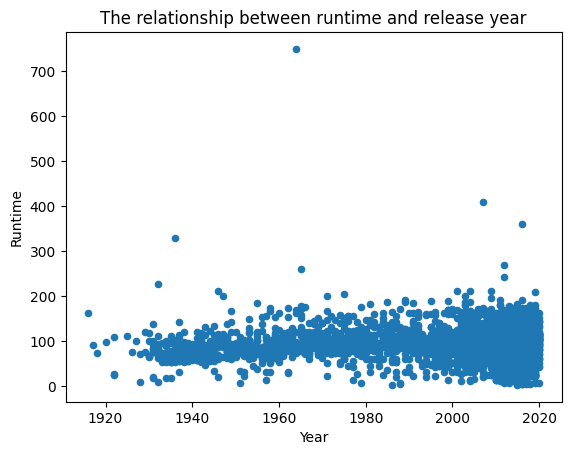

In [37]:
moviesDF.plot(kind = 'scatter', x = 'Year', y = 'Runtime', title = 'The relationship between runtime and release year')
plt.show()

Finding: From the chart, we know that between 1920 and 1980, the runtime of most points is gathered at around 100 while a few points exceed 200 and hover around 50.From 1980 to 2020,the number of points increased, and the runtime of most points ranged from 0 to 200, with several special points in around 400 and 300.

### 3.4a Extra: Generate dummies from the IMDB Categories Good, Average, Bad movies (2’)

In [38]:
# convert categorical variables into dummy/indicator variables
dfDummies = pd.get_dummies(moviesDF['categories'], prefix='label')#we apply dummies to every label,good for machine learning

# concatenate with the original dataframe
encodedMovieDf = pd.concat([moviesDF, dfDummies], axis=1)

encodedMovieDf.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Prime Video,Hulu,Disney+,categories,label_Bad,label_Average,label_Good
Index,,,,,,,,,,,,,,,,,,,
4608,4609,Wake in Fright,1971,18+,7.7,96%,0,Ted Kotcheff,"Drama,Thriller","United Kingdom,Australia,United States",English,109.0,1,0,0,Good,0,0,1
602,603,Tamasha,2015,7+,7.3,67%,1,Imtiaz Ali,"Comedy,Drama,Romance",India,Hindi,139.0,0,0,0,Good,0,0,1
10158,10159,Black Eagle,1988,18+,3.8,NaN,0,Eric Karson,"Action,Drama",United States,English,93.0,1,0,0,Bad,1,0,0
8448,8449,Screwballs,1983,18+,4.7,NaN,0,Rafal Zielinski,Comedy,Canada,English,82.0,1,0,0,Bad,1,0,0
810,811,The Drug King,2018,Not Rated,6.1,80%,1,Min-ho Woo,"Action,Crime,Drama",South Korea,"Korean,Japanese",139.0,0,0,0,Average,0,1,0


### 3.4b Extra: Use the dummies features to assign a color to the data points in the scatter plot (2’)
State your findings from the scatter plot (within 50 words).

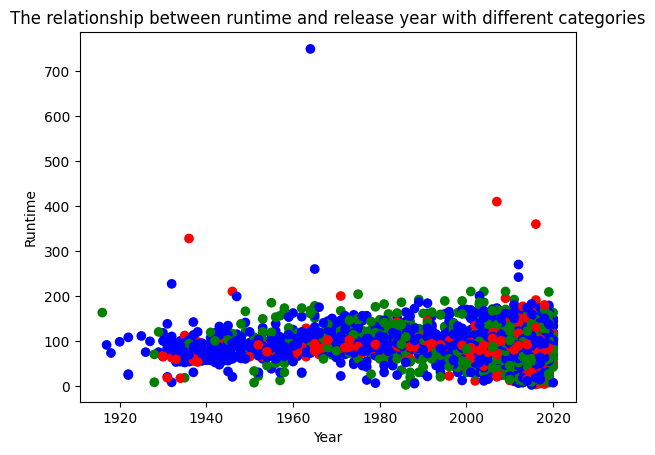

In [39]:
# Create a new column 'color' and assign colors based on the values of the dummy variables
encodedMovieDf['color'] = 'red'  # Default color for all data points
encodedMovieDf.loc[encodedMovieDf['label_Average'] == 1, 'color'] = 'blue'  # Assign blue color to data points with label_Average = 1
encodedMovieDf.loc[encodedMovieDf['label_Good'] == 1, 'color'] = 'green'  # Assign green color to data points with label_Good = 1

# Create a scatter plot with different colors based on the 'color' column
plt.scatter(encodedMovieDf['Year'], encodedMovieDf['Runtime'], c=encodedMovieDf['color'])

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.title('The relationship between runtime and release year with different categories')

# Show the plot
plt.show()

Finding:From the chart, we can know that different categories of movies actually mixed in the chart, and the movies labeled good mainly gathered between 100 and 200 or from 0 to 100, while the movies labeled bad and average mostly presented around 100.

## 3.5 Show the trend of average IMDB ratings per year, using a line chart. (4')
State your findings from the line chart (within 50 words).

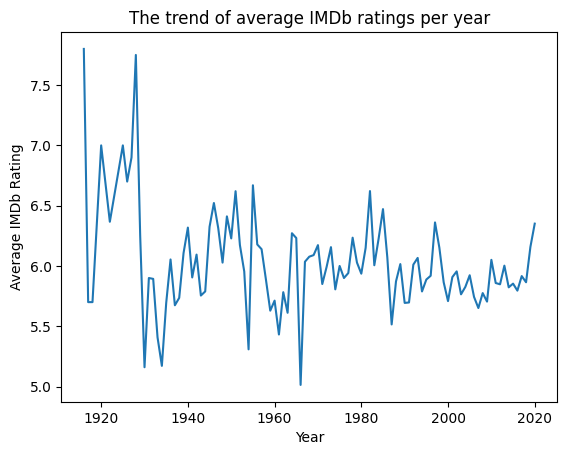

In [40]:
# Calculate the average ratings for each year
average_ratings = moviesDF.groupby('Year')['IMDb'].mean()

# Create a line chart using the 'Year' and 'IMDb' columns
average_ratings.plot(kind='line', title='The trend of average IMDb ratings per year')

# Add labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')

# Show the line chart
plt.show()

Finding: From the chart, we can know that the old movies released around 1920 got a relevant high average rating on the whole, and the trend changes greatly per year ,which is unstable.From 1930 to 2020,the highest average rating was just around 6.5.

## 3.6 Create a boxplot to visualize the IMDB ratings of movies on different platforms. (6')
State your findings by comparing movie ratings on different platforms (within 100 words).

In [41]:
# Create a new column 'platform' using the indicator variables
moviesDF['platform'] = moviesDF[['Netflix', 'Prime Video', 'Hulu', 'Disney+']].idxmax(axis=1)

# Map the column values to the desired platform names
platform_mapping = {
    'Netflix': 'Netflix',
    'Prime Video': 'Prime Video',
    'Hulu': 'Hulu',
    'Disney+': 'Disney+'
}
moviesDF['platform'] = moviesDF['platform'].map(platform_mapping)

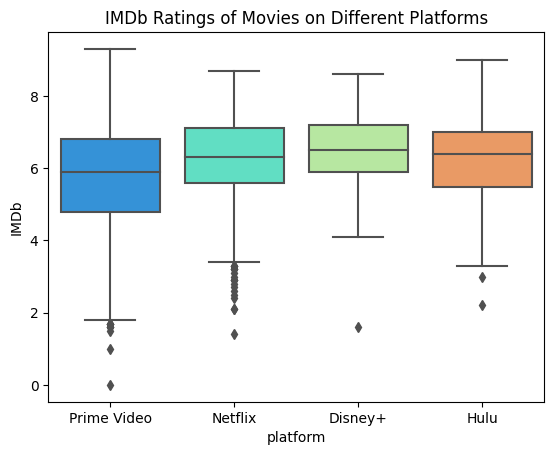

In [42]:
sns.boxplot(x="platform", y="IMDb", data=moviesDF, palette='rainbow');
plt.title('IMDb Ratings of Movies on Different Platforms')
plt.show()

From the chart, we can see that the movies from Prime Video have a more extensive range in IMDb rating while Disney+ has the shortest range, and films on Disney+ have a higher overall rating. The ratings of movies on Netflix and Hulu both range from 3.8 or so to around 9. Overall, the median values of the four platforms are all around 6, and the outliers always gather in low-rating areas. Besides, Prime Video and Netflix have more outliers than Disney+ and Hulu. In this case, Prime Video might have more diverse movies than the other three platforms.

## 3.7 Visualize the number of movies found on each platform, using a bar chart. (6')

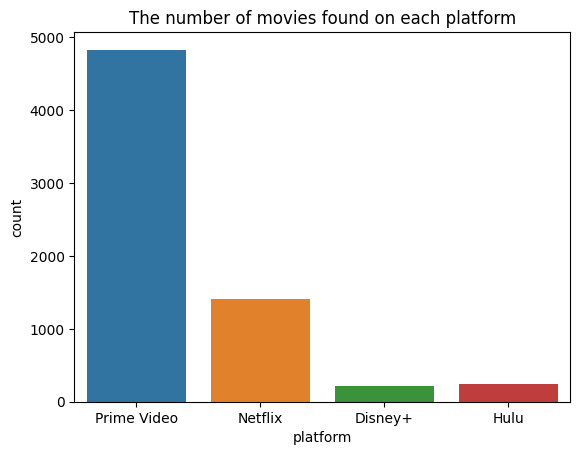

In [43]:
sns.countplot(x='platform', data=moviesDF);
plt.title('The number of movies found on each platform')
plt.show()

## 3.8 Visualize the distribution of runtime of all movies, using a histogram. (7')

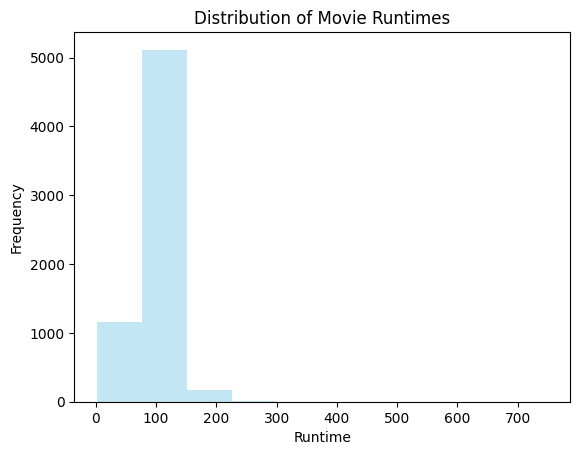

In [44]:
plt.hist(moviesDF['Runtime'], bins=10, alpha=0.5, color='skyblue')

# Add labels and title
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')

plt.show()

## 3.9 Create a word cloud visualization for the ‘Genres’. (6')
State your findings from the wordcloud (within 50 words).

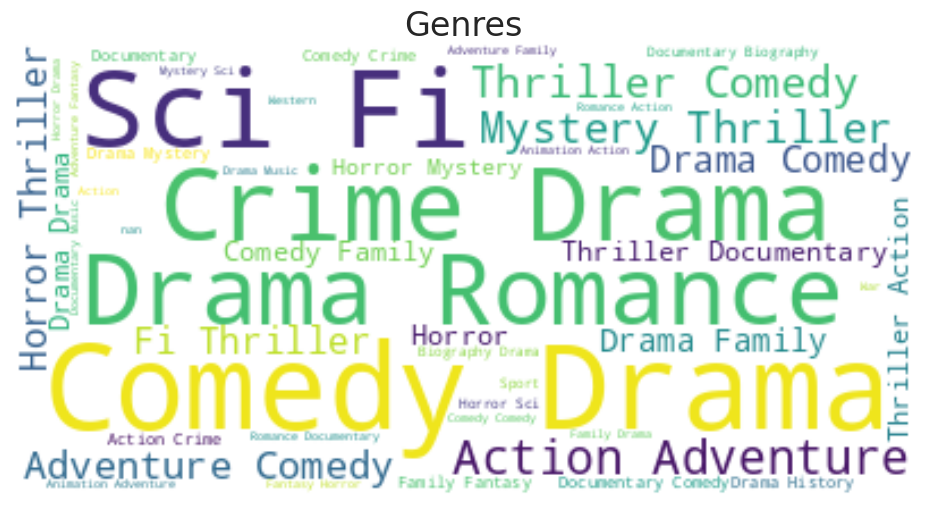

In [45]:
# Create a copy of the DataFrame
moviesDF_copy = moviesDF.copy()

# Convert the 'Genres' column to string
moviesDF_copy['Genres'] = moviesDF_copy['Genres'].astype(str)

# Drop NaN values from the 'Genres' column in the copied DataFrame
moviesDF_copy['Genres'].dropna(inplace=True)

# Create a string of genres
GenresAN = ' '.join(moviesDF_copy['Genres'].tolist())

# Create the word cloud visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
wordcloud = WordCloud(background_color="white").generate(GenresAN)

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Genres', size=24)
plt.show()

Finding:From the word cloud we can know the word "Drama" present in a high frequency,but it might cause interference in the word cloud.Besides,"Comedy","Crime","Romance","Action" and "Adventure" also are obvious in the image.

### 3.9a Analyse the frequency of the words then set a threshold for visualization (2')
Remove too much frequent words and too less frequent words. Use NLP if you wish.

In [46]:
# Create a copy of the DataFrame
moviesDF_copy = moviesDF.copy()

# Convert the 'Genres' column to string
moviesDF_copy['Genres'] = moviesDF_copy['Genres'].astype(str)

# Drop NaN values from the 'Genres' column in the copied DataFrame
moviesDF_copy['Genres'].dropna(inplace=True)

# Tokenize the 'Genres' column into individual words
genres_tokens = word_tokenize(' '.join(moviesDF_copy['Genres'].tolist()))

# Perform frequency analysis on the tokens
freq_dist = FreqDist(genres_tokens)

# Get the frequencies of all words
word_frequencies = freq_dist.items()
print(word_frequencies)

dict_items([('Drama', 2842), (',', 9105), ('Thriller', 1356), ('Comedy', 1866), ('Romance', 949), ('Action', 1065), ('Crime', 697), ('Documentary', 1049), ('Family', 613), ('Horror', 901), ('Mystery', 512), ('Western', 175), ('Biography', 344), ('History', 300), ('Music', 261), ('Sci-Fi', 521), ('Adventure', 727), ('Fantasy', 444), ('Sport', 168), ('Animation', 290), ('Short', 141), ('War', 212), ('nan', 112), ('Film-Noir', 34), ('News', 39), ('Musical', 165), ('Talk-Show', 10), ('Game-Show', 4), ('Reality-TV', 6)])


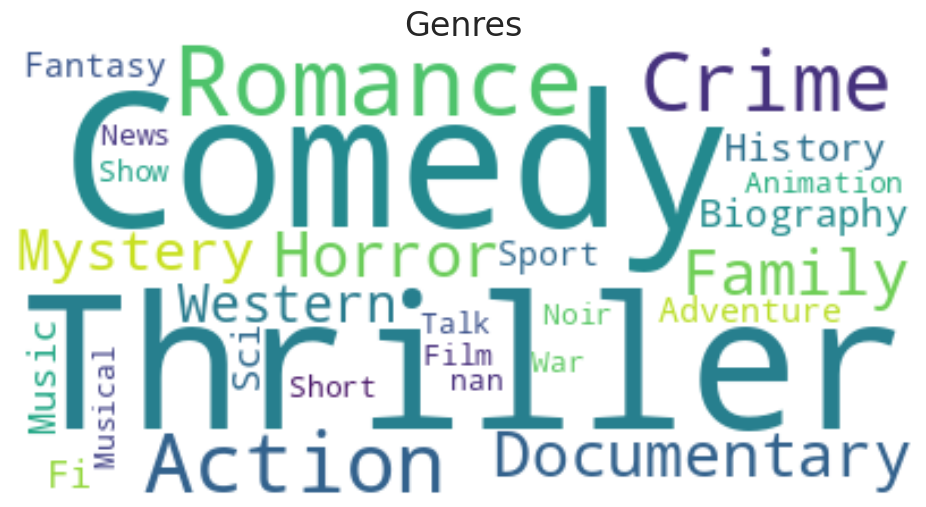

In [47]:
# from the word_frequencies,we set the minimum and maximum frequency thresholds
threshold_min = 10  # Minimum frequency threshold
threshold_max = 2800 # Maximum frequency threshold

# Filter out words based on the frequency thresholds
filtered_words = [word for word, freq in word_frequencies if threshold_min <= freq <= threshold_max]

# Create a string of filtered words
filtered_genres = ' '.join(filtered_words)

# Create the word cloud visualization
wordcloud = WordCloud(background_color="white").generate(filtered_genres)

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Genres', size=24)
plt.show()

### 3.9b Extra: Select a mask for the word cloud (2')

In [48]:
# Download the image masks
import wget

# Setup URL and path variables
baseURL = 'https://kweakkk.github.io/'
image = 'cloud_mask.png'
fullURL = baseURL + image

dataPath = drivePath + '/MyDrive/Colab Notebooks/data/'

fileName1 = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(fileName1)

/content/drive/MyDrive/Colab Notebooks/data//cloud_mask (1).png


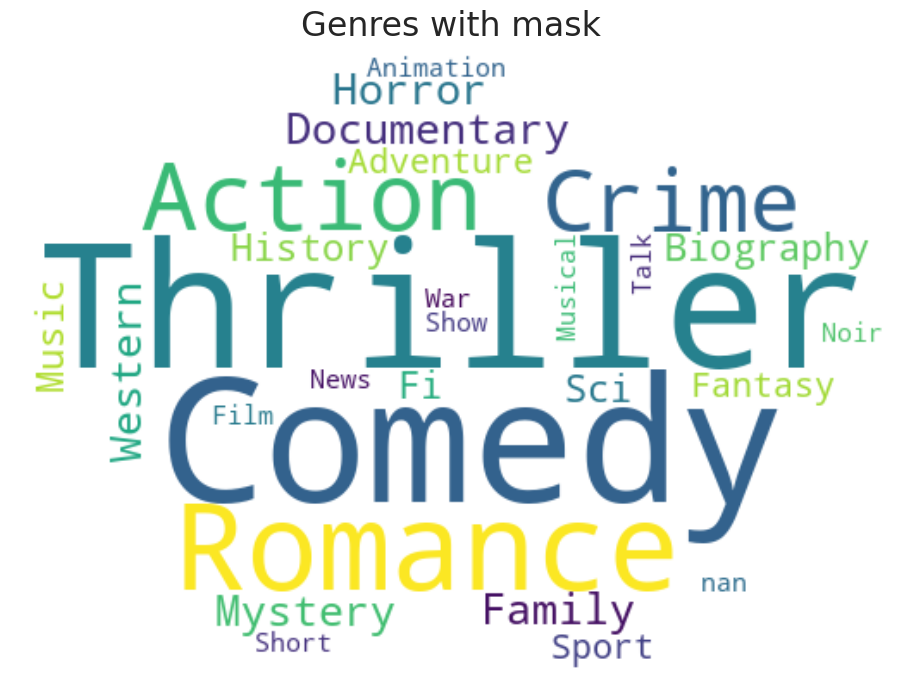

In [49]:
from PIL import Image

cloud = np.array(Image.open(dataPath + 'cloud_mask.png'))
# the image must be black-shaped to be a mask
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=cloud,background_color="white").generate(filtered_genres)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Genres with mask',size=24)
plt.show()

# <div style="color: LimeGreen">Part 4: Exploratory Data Analysis and Visualization [30%]</div>
By exploring the data, generate three additional Research Questions.

Answer them with queries and visualizations. Note that:
- At least one RQ should be answered with small multiple charts (subplots)
- At least one question should be answered using pivot tables

Write down your analysis in 200/300 words per question.    

## RQ1 (Multiples subplots): What is the relationship between runtime and IMDB rating of the movies on four different platforms?

In [50]:
moviesDF_copy = moviesDF.copy()
platforms = moviesDF_copy.groupby('platform').size()
print(platforms.index)
numPlatforms = len(platforms)
print('num of platform:',numPlatforms)

Index(['Disney+', 'Hulu', 'Netflix', 'Prime Video'], dtype='object', name='platform')
num of platform: 4


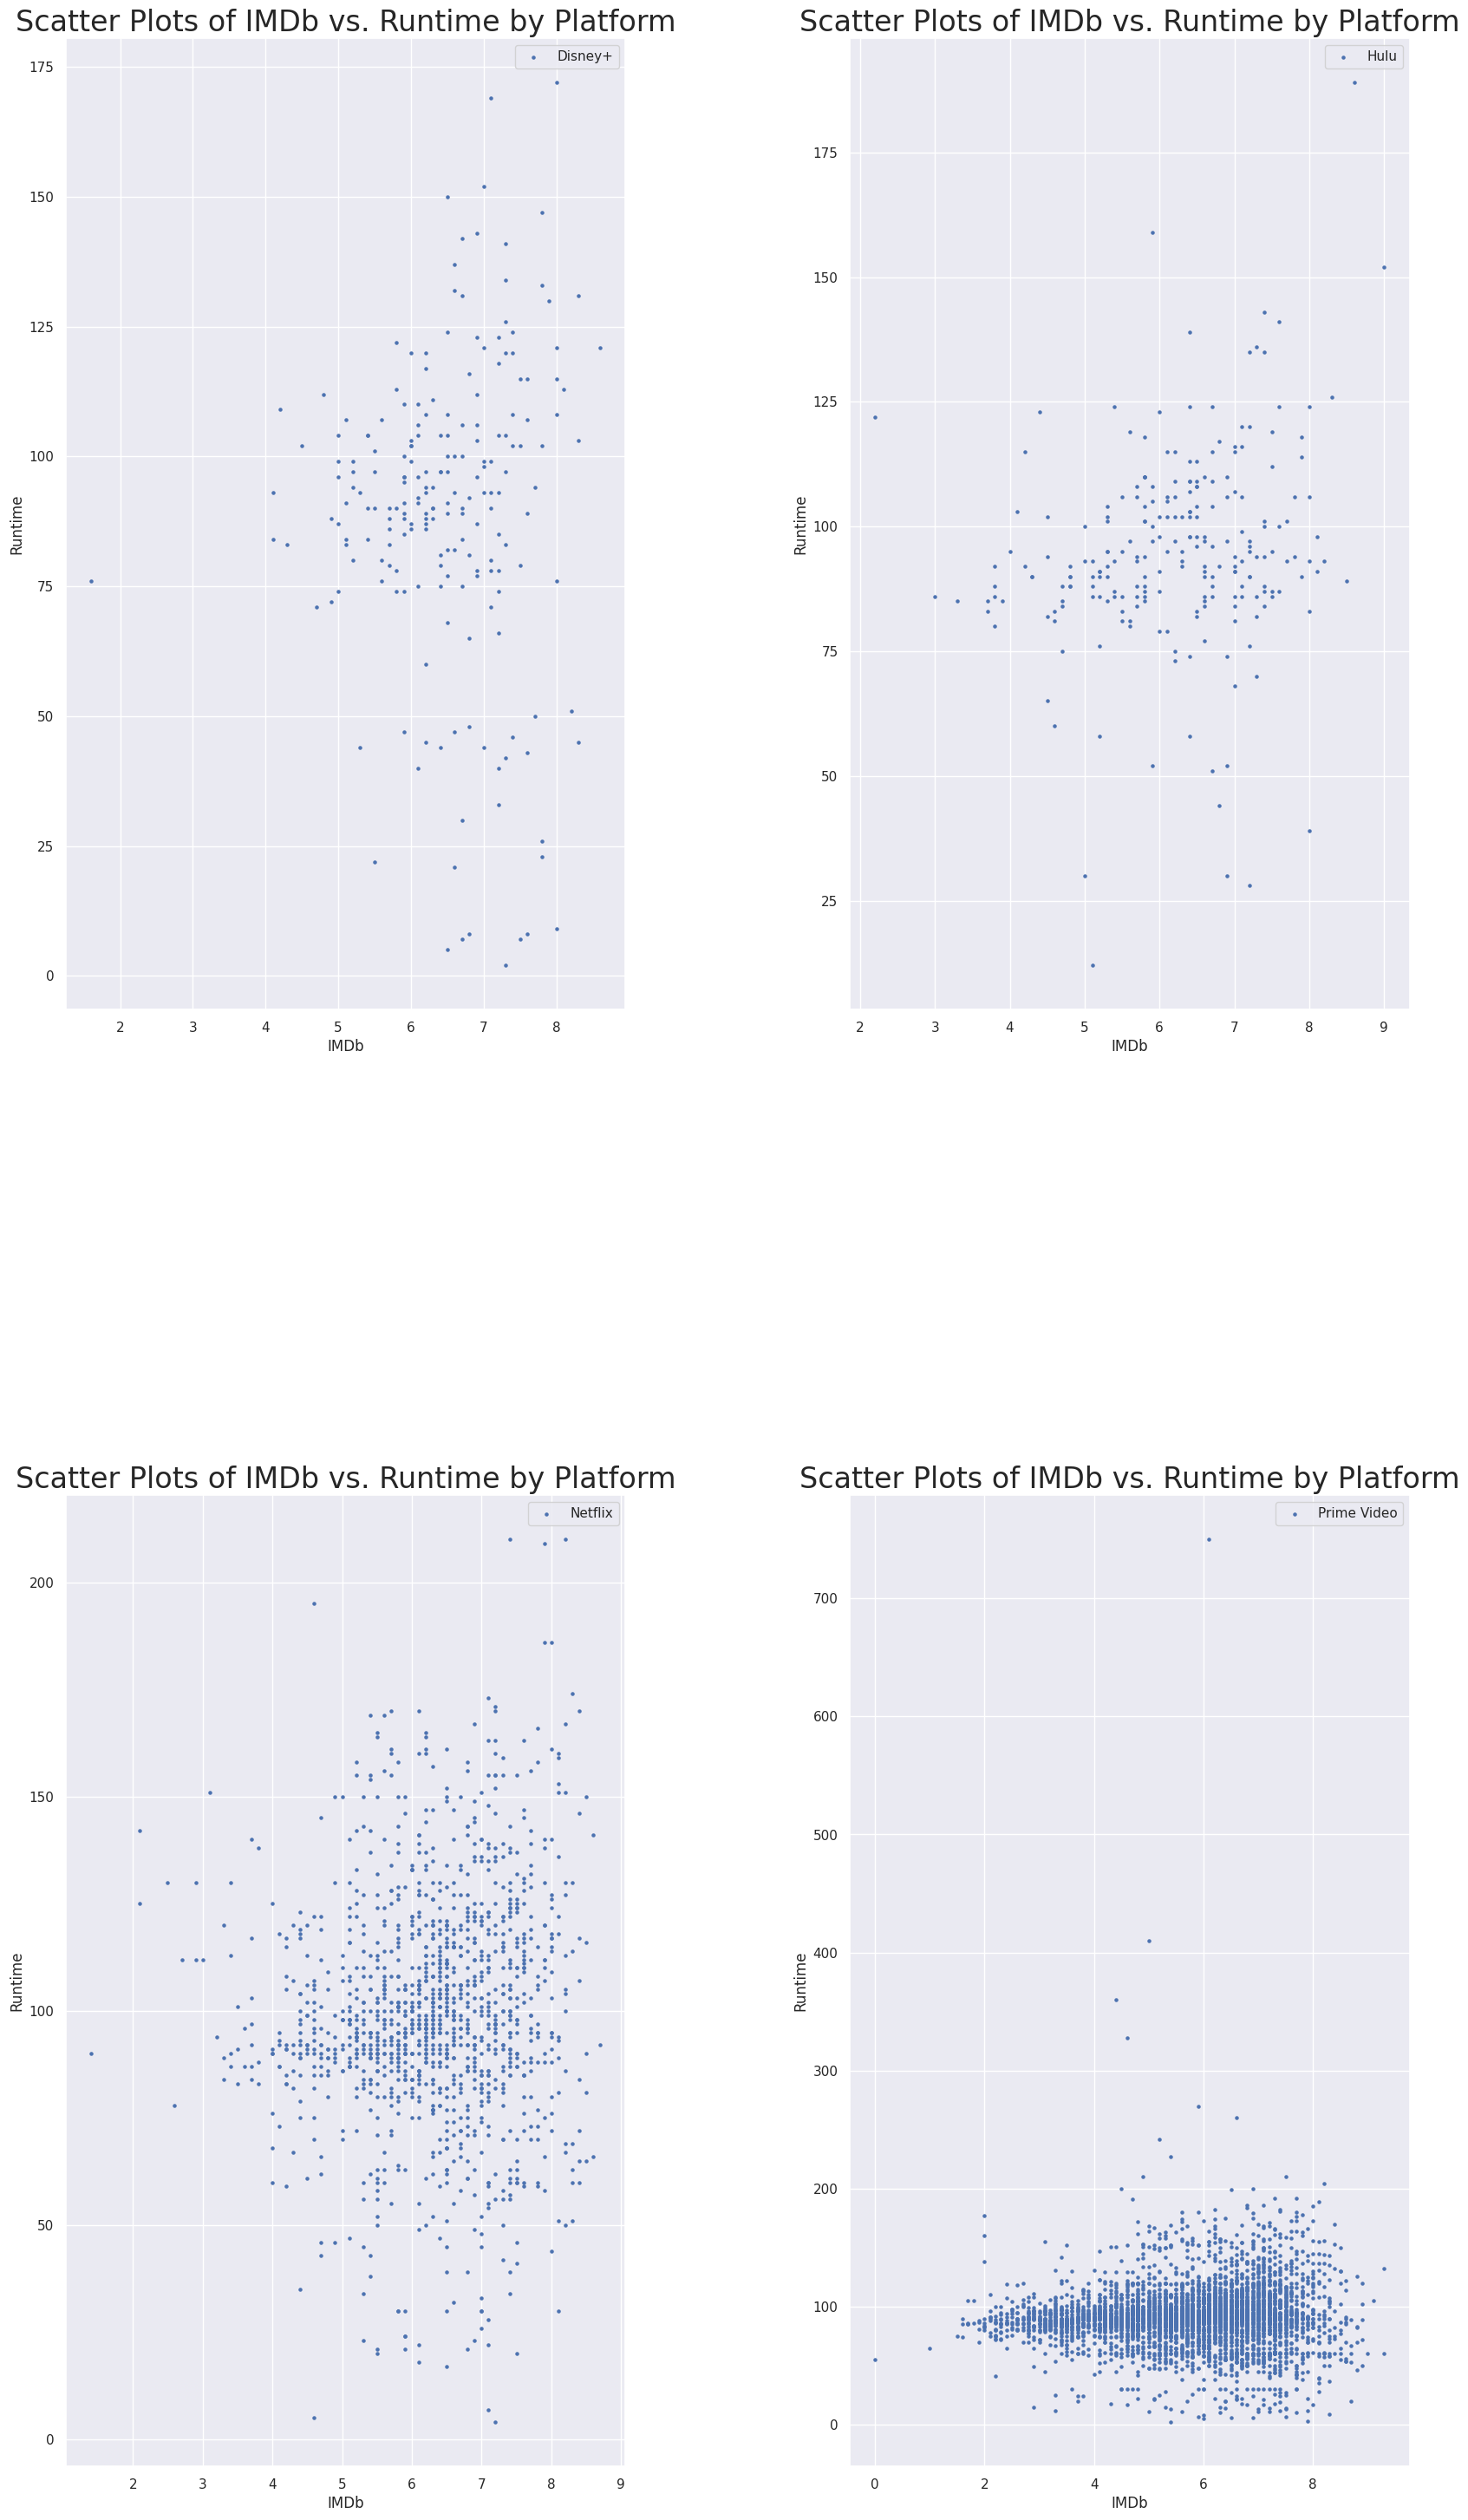

In [51]:
fig = plt.figure(figsize=(20,80))
fig.subplots_adjust(hspace=0.5, wspace = 0.4)
n = 1
for platform in platforms.index:
    ax = fig.add_subplot(numPlatforms,2,n)
    x = moviesDF_copy[moviesDF_copy['platform'] == platform]['IMDb']
    y = moviesDF_copy[moviesDF_copy['platform'] == platform]['Runtime']

    ax.scatter(x,y,s=5)
    ax.set_xlabel('IMDb',fontsize=12)
    ax.set_ylabel('Runtime',fontsize=12)
    ax.legend([platform],loc = 'upper right') #title

    n = n+1
    plt.title('Scatter Plots of IMDb vs. Runtime by Platform', fontsize=24)
plt.show()

Finding:We generated four scatter subplots to visualize the relationship between IMDB rating and runtime,and we found that different platform has specific features.What is most special is Prime Video, despite a high IMDB score or a low grade,the runtime of most movies gathers around 100,except for a small number of points that get the score from 4 to 6, the runtime is concentrated at 200-400. Generally speaking, the runtime of movies with higher scores has a more extensive range from 0 to 200.For Netflix, the points where the rating ranges from 5 to 7 and the runtime is around 100 are relatively dense, and there are also some points gathered in the area where the runtime is around 150 or 50, with a rating between 5 and 8. In contrast, the number of points in Disney+ and Hulu is less than the other platforms, and the distribution is relatively diffuse. What can be observed is that the runtime of most points in these two platforms mainly ranges from 75 to 125, and they also have a similar rating range, from 5 to 8. The difference between the two platforms is that Disney+ has more long-time movies than Hulu, which range from 125 to 175.

## RQ2 (Pivot table): What are the average ratings of movies from four platforms in different age generation?

In [52]:
moviesDF_copy = moviesDF.copy()
moviesDF_copy = moviesDF_copy[moviesDF_copy['Age'] != 'Not Rated']
ages = moviesDF_copy.groupby('Age').size()
print(ages.index)
numAges = len(ages)
print('num of ages:',numAges)

Index(['13+', '16+', '18+', '7+', 'all'], dtype='object', name='Age')
num of ages: 5


In [53]:
table1 = pd.pivot_table(moviesDF_copy, values='IMDb', index=['platform'], columns=['Age'], #index can be multiple,for more difficult table need
                      aggfunc={'IMDb': np.mean})
# Convert the pivot table to a Styler object
styled_table1 = table1.style
# Add a title to the pivot table
styled_table1 = styled_table1.set_caption('Pivot Table - Average IMDb Ratings of different platforms movies in different age')

# Display the styled pivot table
styled_table1

Age,13+,16+,18+,7+,all
platform,,,,,
Disney+,7.187500,nan,nan,6.470667,6.274737
Hulu,6.423333,5.583333,6.328571,6.053846,6.089474
Netflix,6.452096,6.325714,6.269966,6.232283,6.532727
Prime Video,5.883951,5.056322,5.347399,6.025905,5.999320


Finding: By creating the pivot table, we can see that there are two null values in '16+' column and '18+' column of Disney+ platforms,it is resonable due to the fact that the movies produced by Disney are mainly animation cartoons, targeting audiences of low age and all ages, and rarely produce movies with bloody violence and pornographic themes. (the main age ratings are '16+' and '18+')Besides, the average ratings of '13+' and '7+' of Disney+ are the highest among the four platforms, which is at 7.1875 and 6.470667, and it also explains the presence I mentioned before.In contrast, Prime Video received the lowest average scores in these two age ranges,presenting at 5.883951 and 6.025905. In the '16+' and 'all' columns, Netflix gets the highest average scores while Prime Video has the lowest scores in these two age ranges, and Netflix has a stable level among all age ranges in average rating, which all represent a little bit higher than 6. What behaves the best in the '18+' column is the platform Hulu, with a 6.328571 score. On the whole, Prime Video has the lowest scores in all the age ranges. For platform Hulu, the average ratings in '13+', '18+','7+', and 'all' are a little bit higher than 6 except it get 5.583333 in the '16+' range.

## RQ3: (Open question)What is the average rating presence of movies on different age ranges?

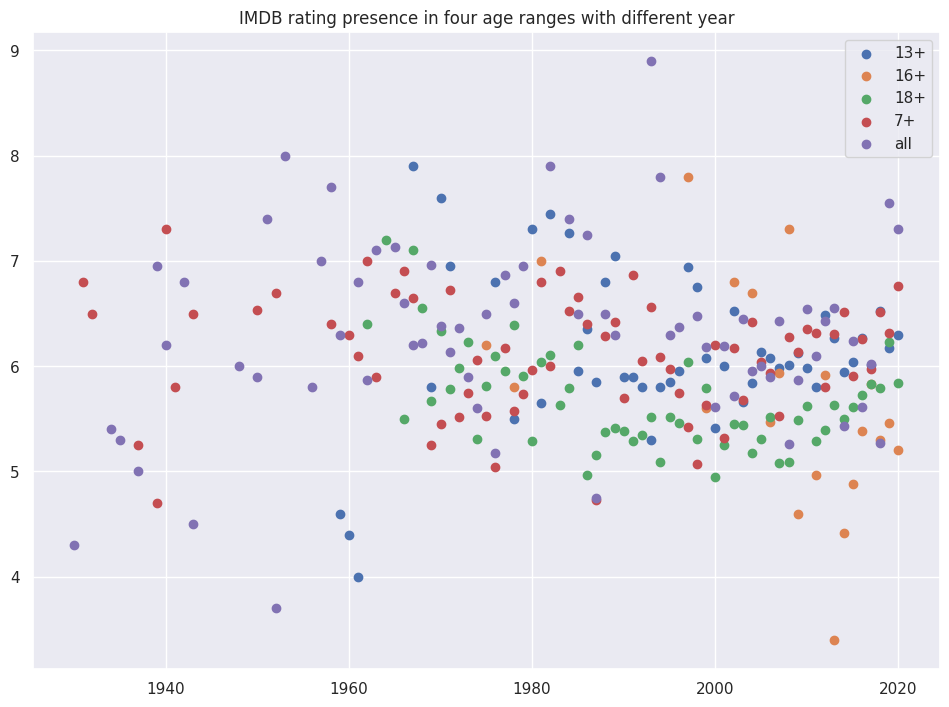

In [54]:
moviesDF_copy_4ages = moviesDF_copy.loc[moviesDF_copy['Age'].isin(['13+', '16+', '18+', '7+', 'all'])]
moviesDF_copy_4ages_pivot = moviesDF_copy_4ages.pivot_table(values='IMDb', columns='Age', index='Year', aggfunc={'IMDb': np.mean})

fig, ax = plt.subplots()
for age_range in moviesDF_copy_4ages_pivot.columns:
    x = moviesDF_copy_4ages_pivot.index
    y = moviesDF_copy_4ages_pivot[age_range]
    ax.scatter(x, y, label=age_range)

ax.set_title('IMDB rating presence in four age ranges with different year')
ax.legend()
plt.show()

Finding: From the chart, firstly, we can know most points mainly gathered between 1960 and 2020, which means that the number of movies increased compared with 1960 and before. Before 1960, only three kinds of points represented movies of 'all,' '7+' and '13+' age range. After 1960, 16+ and 18+ movies began to appear, indicating that film classifications were further divided during this period. Generally speaking, no matter what age group the movie is, most movies score between 5 and 7 points. Compared with before 1960, the score range changed from diffuse to concentrated. In comparison, the scores of 18+ movies are relatively low, while the films of the 'all' category get a high score on the whole, mainly between 5 and 6 and from 6 to 8 representatively. The scores of 13+ and 7+ movies are mainly around 6.Among the five age group movie categories, 16+ movies appeared relatively late, around 1980, and the score span is also relatively wide, including movies with a score of less than 4 points and movies with a score of close to 8 points.The highest score in the picture is close to 9 points, which is a movie for all age groups.In terms of quantity, there are more movies in the 13+, 7+ and all-age categories, while there are fewer movies in the 16+ category.